# Mathematical Derivation of Algorithms

**Junyu Wang**

In [1]:
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
# di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)

In [2]:
import networkx
import matplotlib.pyplot as plt

## Introduction to Graph Theory

#### Definition of Graph

A Simple Graph can be represented by $G(V, E)$ where

$$
V = \left\{v_1, v_2, \cdots, v_n\right\}
$$

is a non-empty finite set of all the vertices (or nodes) and 

$$
E = \left\{e_{12}, \cdots, e_{ij}, \cdots \right\}
$$

is a finite set of all 
the distinct unordered pairs of distinct elements.

#### Weighted Graph

A Weighted Graph is a graph where each edge is given a numerical weight.

#### Connected Graph

A graph is a Connected Graph if and only if there is a path from any vertex to any other vertex.

#### Degree

The Degree of a vertex $v$ of $G(V,E)$ is the number of edges connecting to it, and is written by $deg(v)$

#### Complete Graph

A Simple Graph where each pair of distinct vertices are connected is a Complete Graph, and denoted by $K_n$ if the graph has $n$ vertices.

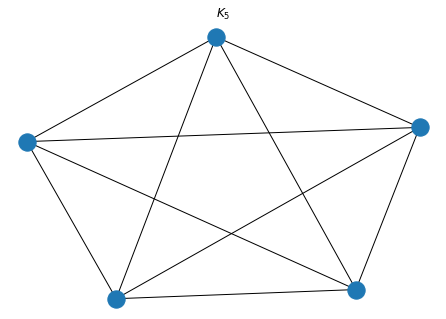

In [3]:
networkx.draw(networkx.complete_graph(5))
plt.title("$K_5$")
plt.show()

#### Bipartite Graph

If the vertex set $V$ of a graph $G(V, E)$ can be split into two disjoint sets $A$ and $B$ so that each edge of $G(V,E)$ joins a vertex of $A$ and a vertex of $B$, then $G(V,E)$ is a bipartite graph.

#### Complete Bipartite Graph

A Complete Bipartite Graph is a bipartite graph where each vertex in $A$ connects to each vertex in $B$ by just one edge.

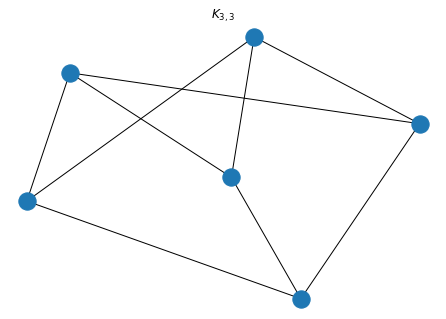

In [4]:
networkx.draw(networkx.algorithms.bipartite.complete_bipartite_graph(3, 3))
plt.title("$K_{3,3}$")
plt.show()

#### Planarity

A graph is planar if and only if it can be drawn in the plane without crossings which means no two edges intersect geometrically except that they share a common vertex.

Remark: $K_{3, 3}$ and $K_5$ are non-planar. It can be proved by Edge Vertex Inequality and you can check the plots above to see they are non-planar.

#### Euler's formula

If $G(V, E)$ is a Connected Planar Graph and let $\left|V\right|, \left|E\right|$ and $\left|F\right|$ denote respectively the number of vertices, edges and faces, then we have

$$
\left|V\right| - \left|E\right| + \left|F\right| = 2
$$

#### Edge Vertex Inequality 

If $G(V, E)$ is a Connected Planar Graph with $\left|V\right| \geq 3$, then we have

$$
\left|E\right| \leq 3\left|V\right| - 6
$$

Proof:

Since each face has at least three edges and then at least three degrees, we have

$$
\sum_{f \in F(G)}{deg(f)} = 2 * \left|E\right| \Longrightarrow 3 \left|F\right| \leq 2 \left|E\right|
$$

Plug the inequality into Euler's formula, we have

$$
3\left|F\right| = 3\left|E\right| - 3\left|V\right| + 6 \leq 2 \left|E\right| \Longrightarrow \left|E\right| \leq 3\left|V\right| - 6
$$

Remark: This inequality will be used as the terminating condition of the loop in PMFG algorithm.

#### Kuratowski's Theorem

A graph is planar if and only if it contains no subgraph $K_5$ or $K_{3, 3}$.

## Planar Maximally Filtered Graph (PMFG)

The PMFG algorithm filters a simple weighted graph into a planar graph $G$ with $\left|E(G)\right| = 3\left|V(G)\right| - 6$ if the number of the original graph has more than $3$ vertices. The construction algorithm is given as follow:

<div style="background-color:rgba(0, 0, 0, 0.0470588); padding:10px 0;font-family:monospace;">
Input: <br>
&nbsp;&nbsp;&nbsp;&nbsp; $V$: vertex set  <br>
&nbsp;&nbsp;&nbsp;&nbsp; $s_{i, j}$: weight(or similarity) between the $i^{th}$ vertex and the $j^{th}$ vertex where $i \neq j$ and $i, j = 1, 2, \cdots, \left|V\right|$<br>
<br>
Output: <br>
&nbsp;&nbsp;&nbsp;&nbsp; $G(V, E)$: planar graph<br>
<br>
Algorithm: <br>
&nbsp;&nbsp;&nbsp;&nbsp; $G(V, E) \leftarrow$ initialize a empty graph<br>
&nbsp;&nbsp;&nbsp;&nbsp; $S \leftarrow$ sort all $s_{i, j}$ in descending order<br>
&nbsp;&nbsp;&nbsp;&nbsp; for $i, j, s_{i, j}$ in $S$ do<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $E \leftarrow E \cup e_{i, j}$ <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; if $G(V, E)$ is planar then<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  $E \leftarrow E - e_{i, j}$ <br> 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; if $\left|E\right| == 3\left|V\right| - 6$ then<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; break for <br>
&nbsp;&nbsp;&nbsp;&nbsp; end for <br>
</div>

#### Advantage over MST

PMFG is a super set of MST and therefore contains more information linked with both 3 and 4-cliques. 

A clique is defined as a complete subgraph. We can know that the maximal clique of MST is at most 2-clique because there is no cycles in MST. We can also deduce that the maximal clique of PMFG is at most 4-clique because 5-clique is non-planar. 

The reason why we can observe 3 and 4-cliques can be explained by the following example. Let's say we have $A, B$ and $C$ within a correlation based network. If $A$ is highly correlated to $B$ and $B$ is highly correlated to $C$, then we can deduce that $A$ is also highly correlated to $C$. Therefore, all three elements form a 3-clique. If we have the fourth element $D$ and it's highly correlated to the other three, all four elements form a 4-clique.

## Introduction to Kalman Filter